In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime = pd.read_csv('../data/denver_crime.csv')

#### Noticed an issue with the data during EDA process. 
#### Stapleton's name changed to Central Park mid 2020.  Switch the name for all years for consistency. 

In [3]:
def change_neighborhood(hood):
    #Mid2020 Stapleton's name changed to Central Park - change for all years
    if hood == 'stapleton':
        return 'central-park'
    return hood

crime['NEIGHBORHOOD_ID'] = crime['NEIGHBORHOOD_ID'].map(change_neighborhood)
'stapleton' in crime.NEIGHBORHOOD_ID.unique()

False

In [4]:
crime.columns

Index(['Unnamed: 0', 'INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE',
       'OFFENSE_CODE_EXTENSION', 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID',
       'FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE',
       'INCIDENT_ADDRESS', 'GEO_X', 'GEO_Y', 'GEO_LON', 'GEO_LAT',
       'DISTRICT_ID', 'PRECINCT_ID', 'NEIGHBORHOOD_ID', 'IS_CRIME',
       'IS_TRAFFIC'],
      dtype='object')

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454540 entries, 0 to 454539
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              454540 non-null  int64  
 1   INCIDENT_ID             454540 non-null  int64  
 2   OFFENSE_ID              454540 non-null  int64  
 3   OFFENSE_CODE            454540 non-null  int64  
 4   OFFENSE_CODE_EXTENSION  454540 non-null  int64  
 5   OFFENSE_TYPE_ID         454540 non-null  object 
 6   OFFENSE_CATEGORY_ID     454540 non-null  object 
 7   FIRST_OCCURRENCE_DATE   454540 non-null  object 
 8   LAST_OCCURRENCE_DATE    152118 non-null  object 
 9   REPORTED_DATE           454540 non-null  object 
 10  INCIDENT_ADDRESS        414371 non-null  object 
 11  GEO_X                   450607 non-null  float64
 12  GEO_Y                   450607 non-null  float64
 13  GEO_LON                 450606 non-null  float64
 14  GEO_LAT             

In [6]:
crime.head()

Unnamed: 0  INCIDENT_ID         OFFENSE_ID  OFFENSE_CODE  \
0           0   2018869789   2018869789239900          2399   
1           1    202111218    202111218570700          5707   
2           2  20176005213  20176005213239901          2399   
3           3  20196012240  20196012240230800          2308   
4           4   2018861883   2018861883501600          5016   

   OFFENSE_CODE_EXTENSION                 OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  \
0                       0                     theft-other             larceny   
1                       0            criminal-trespassing    all-other-crimes   
2                       1                   theft-bicycle             larceny   
3                       0                 theft-from-bldg             larceny   
4                       0  violation-of-restraining-order    all-other-crimes   

   FIRST_OCCURRENCE_DATE   LAST_OCCURRENCE_DATE           REPORTED_DATE  \
0  12/27/2018 3:58:00 PM                    NaN   12/27/2018 4:51:00 PM   
1    1/6/2021 9:20:00 PM                    NaN    1/7/2021 12:23:00 AM   
2    6/8/2017 1:15:00 PM    6/8/2017 5:15:00 PM    6/12/2017 8:44:00 AM   
3   12/7/2019 1:07:00 PM   12/7/2019 6:30:00 PM    12/9/2019 1:35:00 PM   
4  12/22/2018 8:15:00 PM  12/22/2018 8:31:00 PM  12/22/2018 10:00:00 PM   

      INCIDENT_ADDRESS      GEO_X      GEO_Y     GEO_LON    GEO_LAT  \
0    2681 N HANOVER CT  3178210.0  1700715.0 -104.866156  39.755561   
1      1701 WYNKOOP ST  3140598.0  1699567.0 -104.999951  39.753054   
2         1705 17TH ST  3140790.0  1699792.0 -104.999264  39.753669   
3     1350 N IRVING ST  3132400.0  1694088.0 -105.029208  39.738134   
4  13625 E RANDOLPH PL  3188580.0  1716158.0 -104.828868  39.797750   

   DISTRICT_ID  PRECINCT_ID NEIGHBORHOOD_ID  IS_CRIME  IS_TRAFFIC  
0          5.0        512.0    central-park         1           0  
1          6.0        612.0   union-station         1           0  
2          6.0        612.0   union-station         1           0  
3          1.0        122.0     west-colfax         1           0  
4          5.0        521.0       montbello         1           0

In [7]:
crime = pd.read_csv('../data/denver_crime.csv')

cols = ['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE']
for col in cols:
    crime[col] = pd.to_datetime(crime[col], format='%m/%d/%Y %I:%M:%S %p')

In [8]:
crime['year']=crime.FIRST_OCCURRENCE_DATE.dt.year
crime['month']=crime.FIRST_OCCURRENCE_DATE.dt.month   
crime['week']=crime.FIRST_OCCURRENCE_DATE.dt.week 
crime[crime.year!=2021].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451404 entries, 0 to 454539
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              451404 non-null  int64         
 1   INCIDENT_ID             451404 non-null  int64         
 2   OFFENSE_ID              451404 non-null  int64         
 3   OFFENSE_CODE            451404 non-null  int64         
 4   OFFENSE_CODE_EXTENSION  451404 non-null  int64         
 5   OFFENSE_TYPE_ID         451404 non-null  object        
 6   OFFENSE_CATEGORY_ID     451404 non-null  object        
 7   FIRST_OCCURRENCE_DATE   451404 non-null  datetime64[ns]
 8   LAST_OCCURRENCE_DATE    150740 non-null  datetime64[ns]
 9   REPORTED_DATE           451404 non-null  datetime64[ns]
 10  INCIDENT_ADDRESS        411401 non-null  object        
 11  GEO_X                   447488 non-null  float64       
 12  GEO_Y                   447488

In [9]:
447487/451404

0.9913226289532215

In [10]:
crime = crime[crime.year != 2021]

In [11]:
cat_by_year = crime.groupby(['year', 'OFFENSE_CATEGORY_ID']).agg({'INCIDENT_ID':'count'}).reset_index()
cat_by_year

year       OFFENSE_CATEGORY_ID  INCIDENT_ID
0   2016        aggravated-assault         2139
1   2016          all-other-crimes        16413
2   2016                     arson           95
3   2016                auto-theft         4822
4   2016                  burglary         4669
..   ...                       ...          ...
70  2020                   robbery         1203
71  2020            sexual-assault          621
72  2020  theft-from-motor-vehicle        10387
73  2020          traffic-accident        14898
74  2020        white-collar-crime         1106

[75 rows x 3 columns]

In [12]:
def capitalize_titles(string):
    return ' '.join([x.capitalize() for x in string.split('-')])

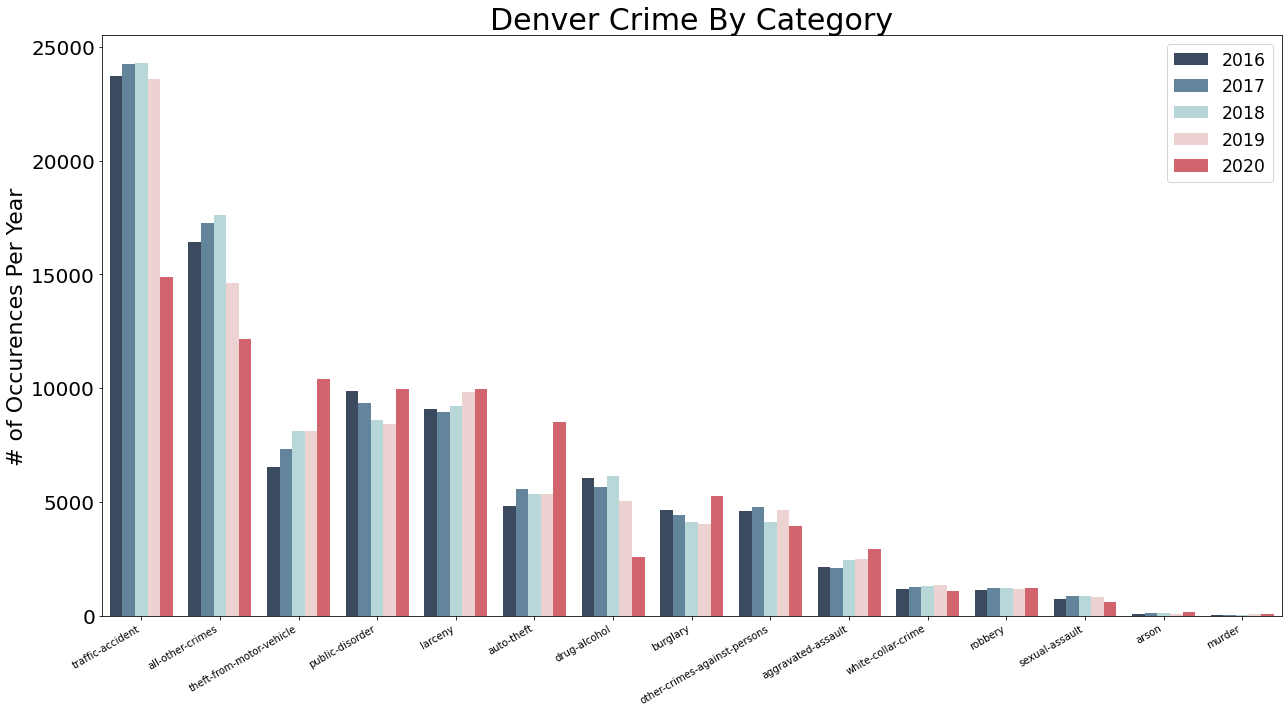

In [13]:
def barplot_city_crime_by_category(df, palette, offense_category_id, incident_id, city):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.set_palette(palette)
    cat_by_year = df.groupby(['year', offense_category_id]).agg({incident_id:'count'}).reset_index()
    ax = sns.barplot(x=offense_category_id, y=incident_id, hue='year', data=cat_by_year[cat_by_year.year!=2021].sort_values(incident_id, ascending=False), saturation=0.7, alpha=0.9)

    #ax.set_xticklabels(ax.get_xticks(), size=30)
    ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=20)

    plt.ylabel('# of Occurences Per Year', size=22)
    plt.xlabel('')
    plt.setp(ax.patches, linewidth=1)
    plt.title(f'{city} Crime By Category', fontsize=30)
    plt.xticks(rotation = 30, ha='right')
    plt.tight_layout()
    plt.legend(fontsize='xx-large')
    #fig.savefig(f'../images/{city}CrimeByCategoryBarplot.png')

p = ["#1D3557","#457B9D","#A8DADC","#F3C6C6","#E63946"]
barplot_city_crime_by_category(crime, p, 'OFFENSE_CATEGORY_ID', 'INCIDENT_ID', 'Denver')

### Investigate Traffic-Accidents further

Text(0.5, 0, 'Month')

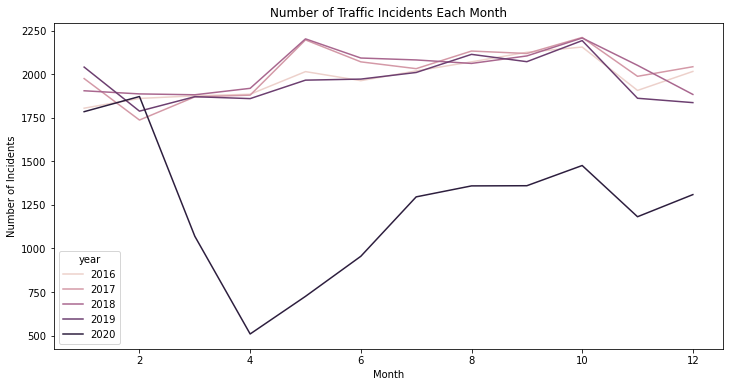

In [14]:
traffic_df = crime[crime.OFFENSE_CATEGORY_ID == 'traffic-accident'].copy()
traffic_df['month']=traffic_df.FIRST_OCCURRENCE_DATE.dt.month
traffic_df.head()
traffic_df = traffic_df.groupby(['year', 'month']).agg({'INCIDENT_ID': 'count'}).reset_index()
traffic_df.head()
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x='month',y='INCIDENT_ID', hue='year', data=traffic_df[traffic_df['year']!=2021])
plt.ylabel('Number of Incidents')
plt.title('Number of Traffic Incidents Each Month')
plt.xlabel('Month')

# Graph all categories over time

In [15]:
def plot_specific_category_over_time(ax, df, specific_category, OFFENSE_CATEGORY_ID, FIRST_OCCURRENCE_DATE, INCIDENT_ID):
    cat_df = df[df.OFFENSE_CATEGORY_ID == specific_category].copy()
    cat_df['month']=cat_df.FIRST_OCCURRENCE_DATE.dt.month
    cat_df['year']=cat_df.FIRST_OCCURRENCE_DATE.dt.year
    cat_df = cat_df.groupby(['year', 'month']).agg({INCIDENT_ID: 'count'}).rename(columns={INCIDENT_ID:'incident_count'}).reset_index()
    
    n =  max(cat_df.year) - min(cat_df.year) + 1
    ax.set_prop_cycle('color',[plt.cm.bone(i) for i in np.linspace(0, 0.8, n)][::-1])
    
    for year in range(min(cat_df.year), max(cat_df.year)+1):  
        tmp = cat_df[cat_df.year==year]
        if year != 2020:
            ax.plot(tmp.month, tmp.incident_count, 'o-', label=f'{year}')
        if year == 2020:
            ax.plot(tmp.month, tmp.incident_count, 'o-', color='red', label=f'{year}',lw=2)
    ax.set_title(f'Number of {capitalize_titles(specific_category)} Incidents By Month', fontsize=25)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Number of Incidents', fontsize=20)
    ax.set_xticks(range(1,13))
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.legend(title='year')

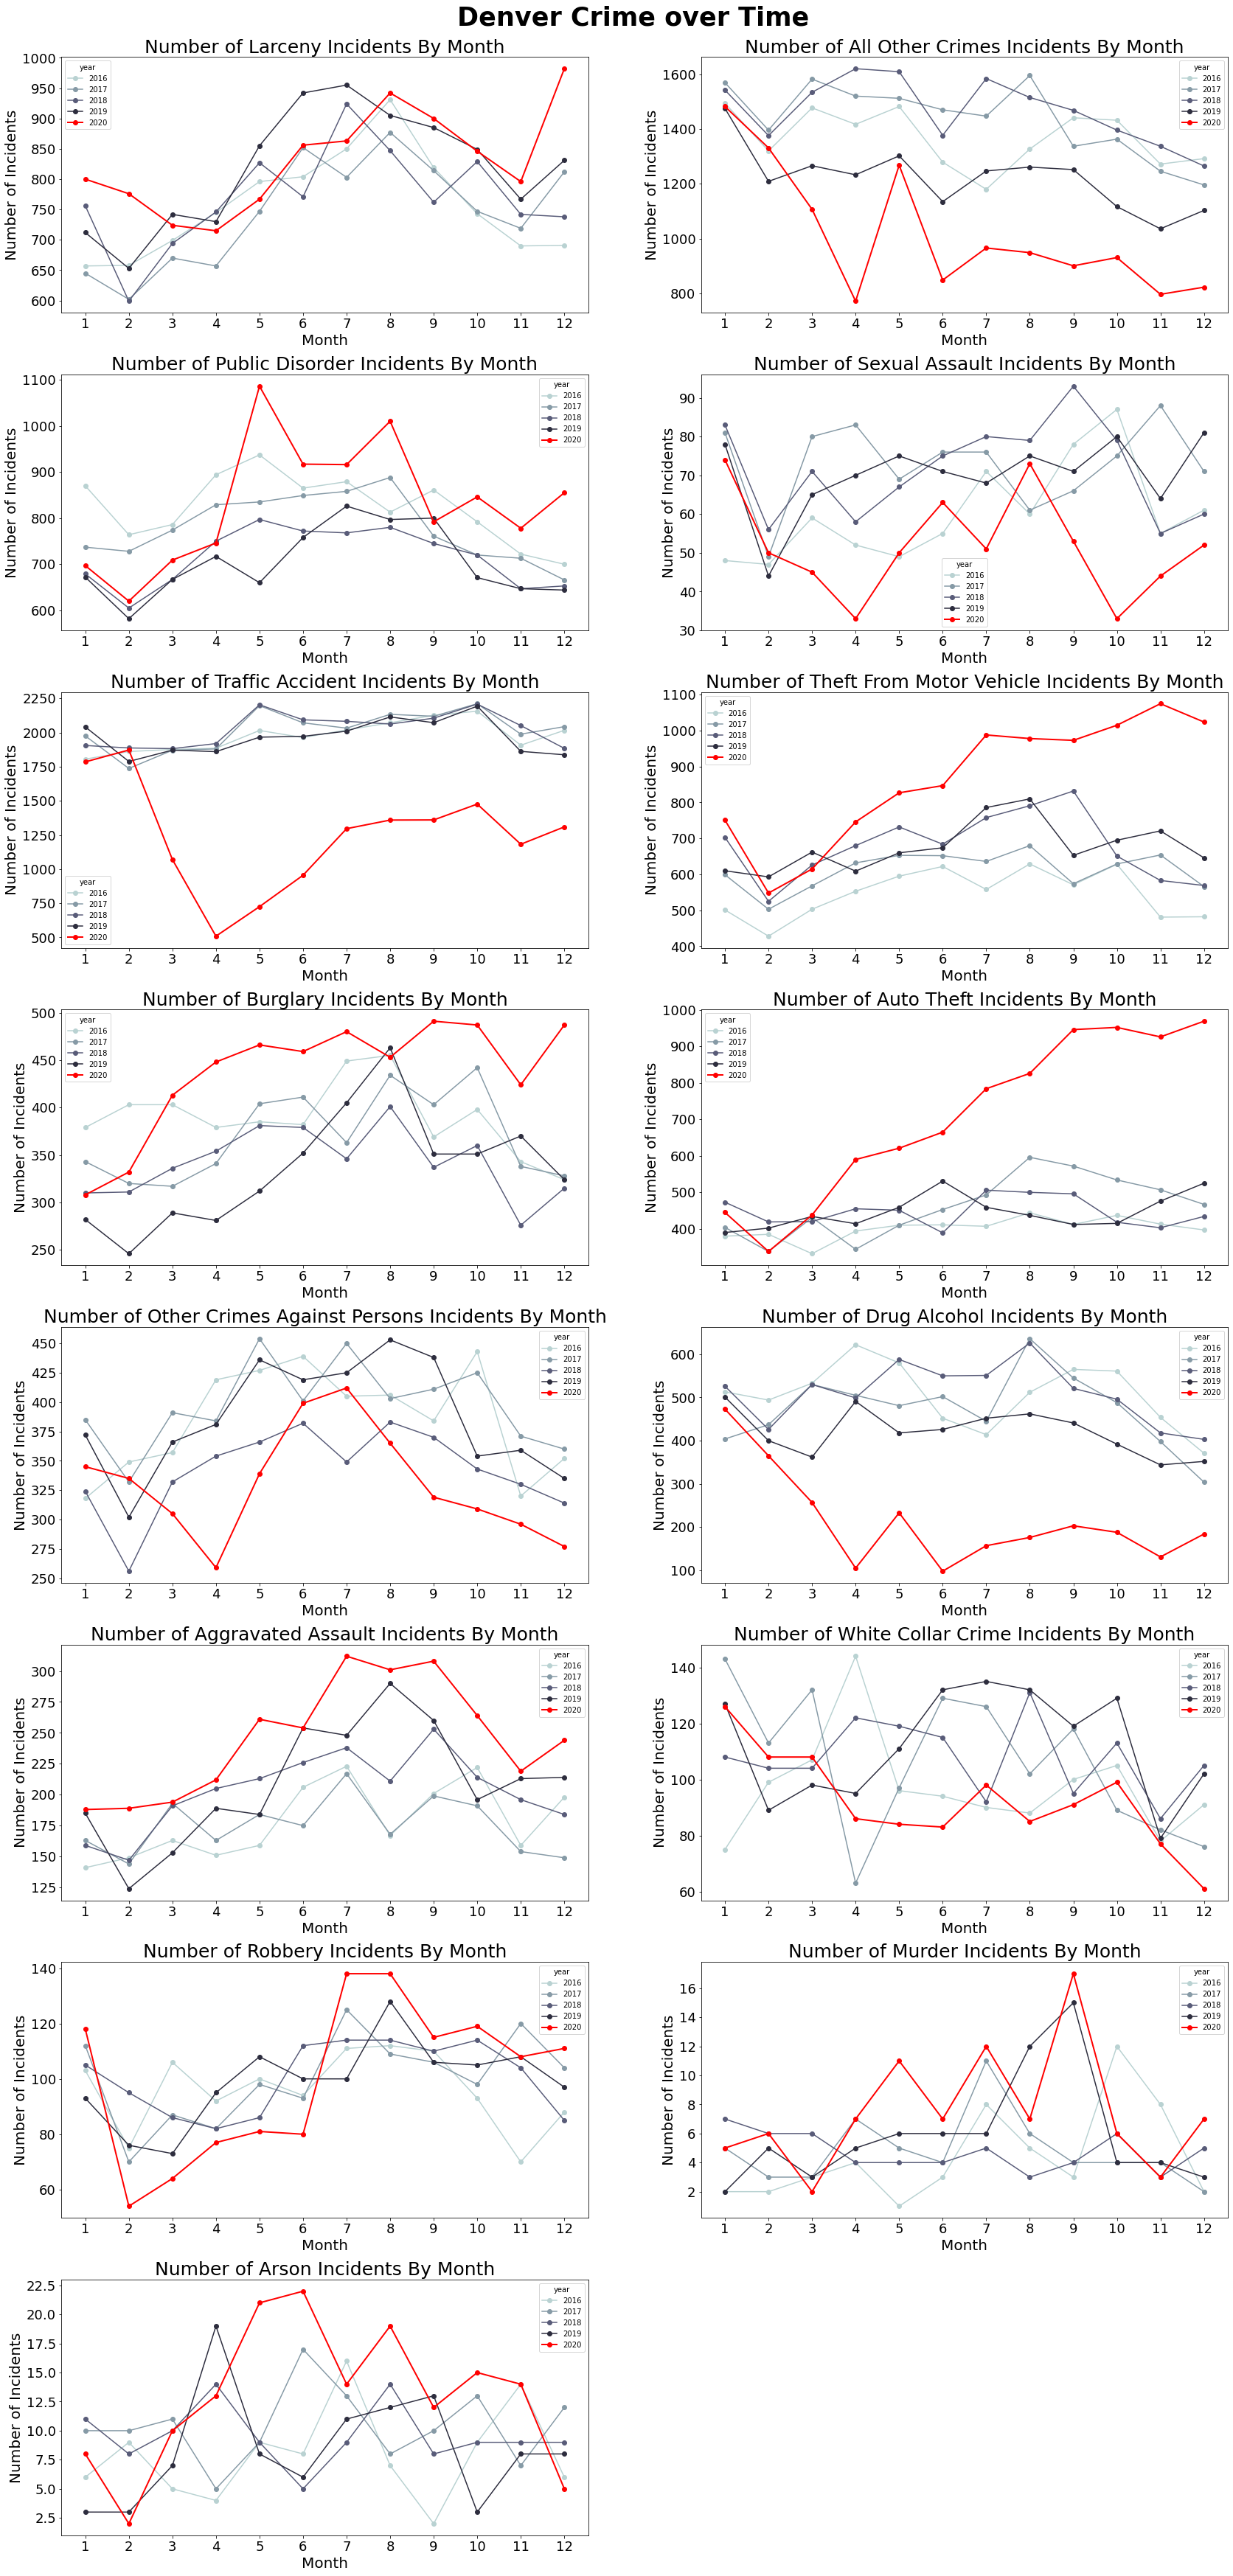

In [16]:
def plot_all_cats_over_time(df, OFFENSE_CATEGORY_ID, FIRST_OCCURRENCE_DATE, INCIDENT_ID, city):
    categories = df.OFFENSE_CATEGORY_ID.unique()
    num_rows = int(np.ceil(len(categories)/2))
    fig, axes = plt.subplots(num_rows, 2, figsize=(24, num_rows*6))
    for category, ax in zip(categories, axes.flatten()):
        plot_specific_category_over_time(ax, df, category, OFFENSE_CATEGORY_ID, FIRST_OCCURRENCE_DATE, INCIDENT_ID)
    if len(categories) != num_rows * 2:
        axes.flatten()[-1].axis('off')
    fig.suptitle(f'{city} Crime over Time', x=0.5, y=1.01, fontsize=35, fontweight='bold')
    plt.tight_layout()
    fig.savefig(f'{city}_Crime_over_Time.png')
    
plot_all_cats_over_time(crime,'OFFENSE_CATEGORY_ID','FIRST_OCCURRENCE_DATE', 'INCIDENT_ID', 'Denver')

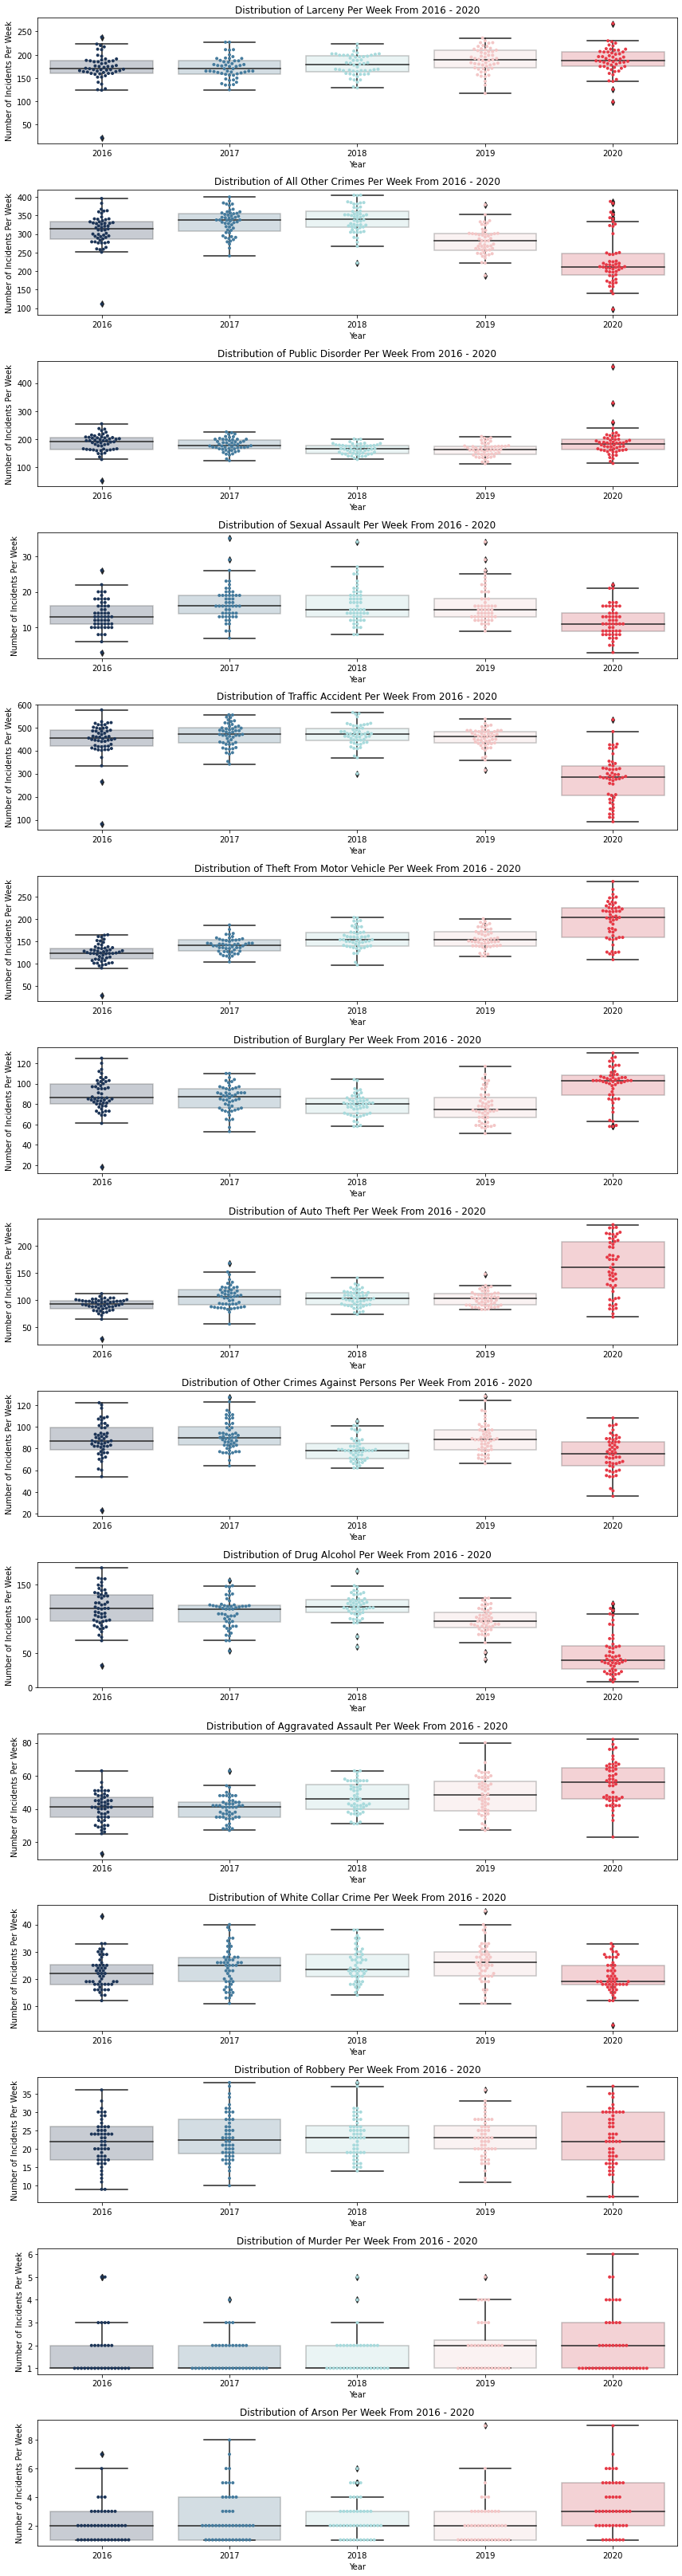

In [17]:
def boxplots_by_cat(df, offense_category_id):
    categories = df[offense_category_id].unique()
    fig, axes = plt.subplots(len(categories), 1, figsize=(12, 3*len(categories)))
    for category, ax in zip(categories, axes.flatten()):
        gtmp = df[df[offense_category_id] == category].groupby(['year', 'week']).agg({'INCIDENT_ID':'count'}).rename(columns={'INCIDENT_ID': 'num_of_incidents'}).reset_index()
        f = sns.boxplot(x='year', y='num_of_incidents', data=gtmp, boxprops=dict(alpha=0.25), ax=ax)
        f = sns.swarmplot(x='year', y='num_of_incidents', data=gtmp, size=4, ax=ax)
        f.set(xlabel='Year',ylabel='Number of Incidents Per Week')
        f.set_title(f'Distribution of {capitalize_titles(category)} Per Week From 2016 - 2020')
        plt.tight_layout()
        #fig.savefig('../images/Denver_Boxswarm_By_Cat.png')
        
boxplots_by_cat(crime, 'OFFENSE_CATEGORY_ID')
  



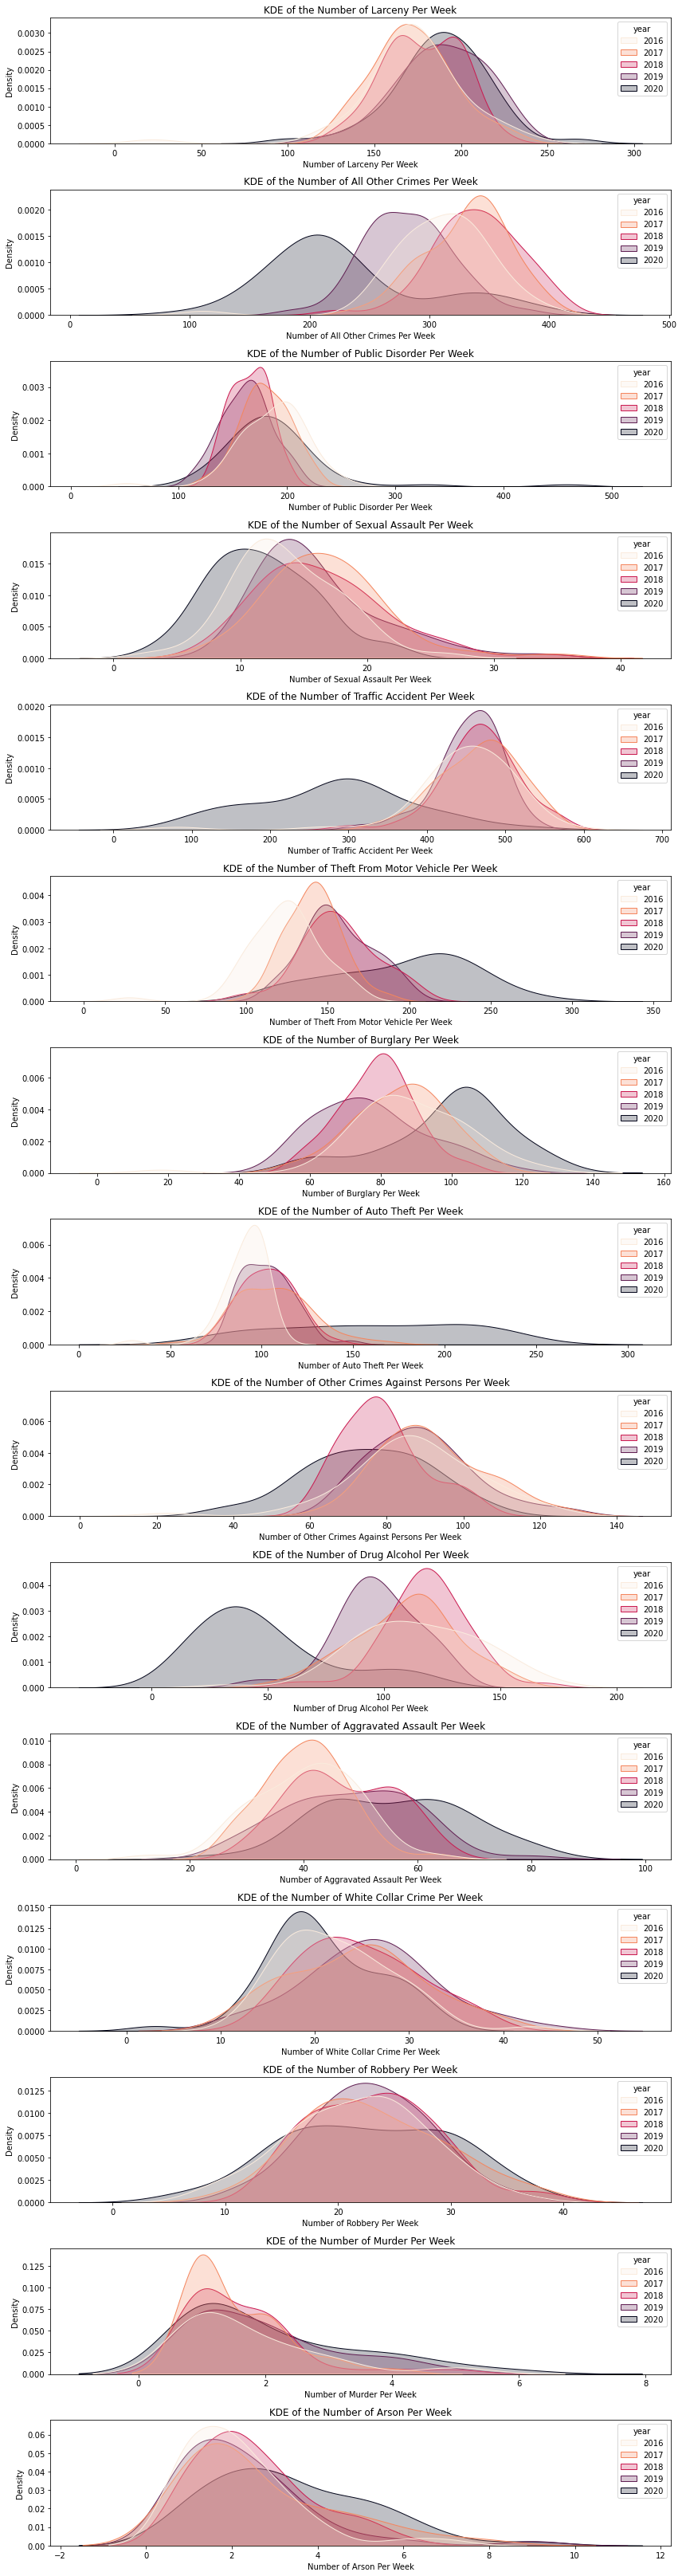

In [18]:
def kdeplot_by_cat(df, offense_category_id):
    palette = sns.color_palette("rocket_r", as_cmap=True)
    categories = crime.OFFENSE_CATEGORY_ID.unique()
    fig, axes = plt.subplots(len(categories), 1, figsize=(12, 3*len(categories)))
    for category, ax in zip(categories, axes.flatten()):
        gtmp = crime[crime['OFFENSE_CATEGORY_ID'] == category].groupby(['year', 'week']).agg({'INCIDENT_ID':'count'}).rename(columns={'INCIDENT_ID': 'num_of_incidents'}).reset_index()
        g = sns.kdeplot(data=gtmp, x='num_of_incidents', hue='year', fill=True, palette=palette, ax=ax)
        g.set_title(f'KDE of the Number of {capitalize_titles(category)} Per Week')
        g.set_xlabel(f'Number of {capitalize_titles(category)} Per Week')
    plt.tight_layout()

    #fig.savefig('../images/Denver_KDEplots_By_Cat.png')

kdeplot_by_cat(crime, 'OFFENSE_CATEGORY_ID')

In [19]:
def box_swarm_by_category(df, ax, palette, num_of_incidents):
    sns.set_palette(palette)
    f = sns.boxplot(x='year', y=num_of_incidents, data=df, boxprops=dict(alpha=0.25), ax=ax)
    f = sns.swarmplot(x='year', y=num_of_incidents, data=df, size=6, ax=ax)
    f.set_xlabel('Year', fontsize=fs)
    f.set_ylabel('', fontsize=fs)
    f.tick_params(labelsize=fs)
    f.axes.set_title(f"Distribution of Monthly ",fontsize=18)

In [20]:
def lineplot_specific_category_over_time(ax, df, fs, specific_category, OFFENSE_CATEGORY_ID, FIRST_OCCURRENCE_DATE, INCIDENT_ID):
    cat_df = df[df.OFFENSE_CATEGORY_ID == specific_category].copy()
    cat_df = cat_df.groupby(['year', 'month']).agg({INCIDENT_ID: 'count'}).rename(columns={INCIDENT_ID:'incident_count'}).reset_index()

    n =  max(cat_df.year) - min(cat_df.year) + 1
    ax.set_prop_cycle('color',[plt.cm.bone(i) for i in np.linspace(0, 0.8, n)][::-1])
    
    for year in range(min(cat_df.year), max(cat_df.year)+1):  
        tmp = cat_df[cat_df.year==year]
        if year != 2020:
            ax.plot(tmp.month, tmp.incident_count, 'o-', label=f'{year}')
        if year == 2020:
            ax.plot(tmp.month, tmp.incident_count, 'o-', color='red', label=f'{year}',lw=2)
    ax.set_title(f'Number of {capitalize_titles(specific_category)} Incidents By Month', fontsize=fs)
    ax.set_xlabel('Month', fontsize=fs)
    ax.set_ylabel('Number of Incidents', fontsize=fs)
    ax.set_xticks(range(1,13))
    ax.xaxis.set_tick_params(labelsize=fs)
    ax.yaxis.set_tick_params(labelsize=fs)
    ax.legend(title='year')
    
    
def double_plot(df, category, offense_category_id, first_occurence_date, incident_id, fs, city):
    fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)
    cat_gp = df[df[offense_category_id] == category].groupby(['year', 'month']).agg({incident_id:'count'}).rename(columns={incident_id: 'num_of_incidents'}).reset_index()
    
    lineplot_specific_category_over_time(axes[0], df, fs, category, offense_category_id, first_occurence_date, incident_id)
    
    
    #2nd Graph - Boxplot/swarmplot
    colors = [plt.cm.bone(i) for i in np.linspace(0, 0.9, 5)][::-1]
    colors.append('red')
    sns.set_palette(colors[1:])
    f = sns.boxplot(x='year', y='num_of_incidents', data=cat_gp, boxprops=dict(alpha=0.25), ax=axes[1])
    f = sns.swarmplot(x='year', y='num_of_incidents', data=cat_gp, size=6, ax=axes[1])
    f.set_xlabel('Year', fontsize=fs)
    f.set_ylabel('', fontsize=fs)
    f.tick_params(labelsize=fs)
    f.axes.set_title(f"Distribution of Monthly {capitalize_titles(category)} Incidents",fontsize=fs)
    plt.tight_layout()
    #fig.savefig(f'../images/{city}_{category}_Over_Time.png')

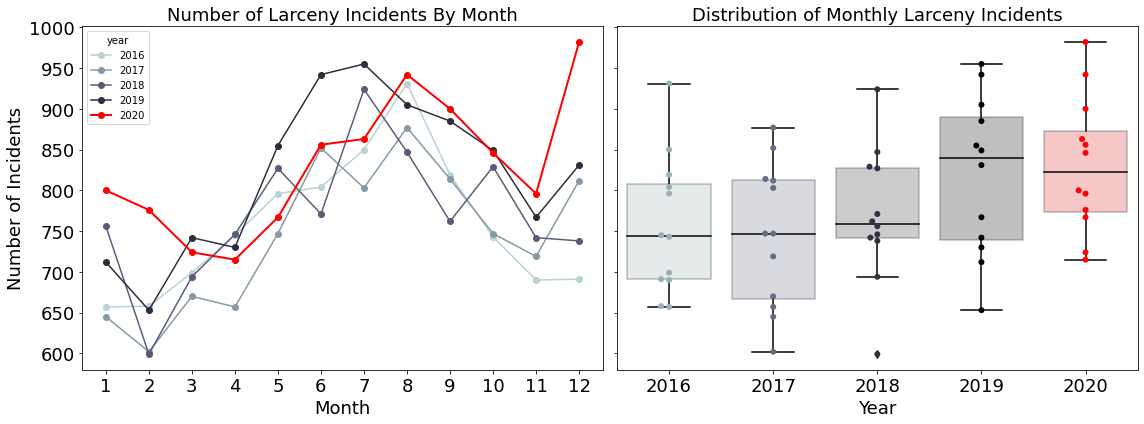

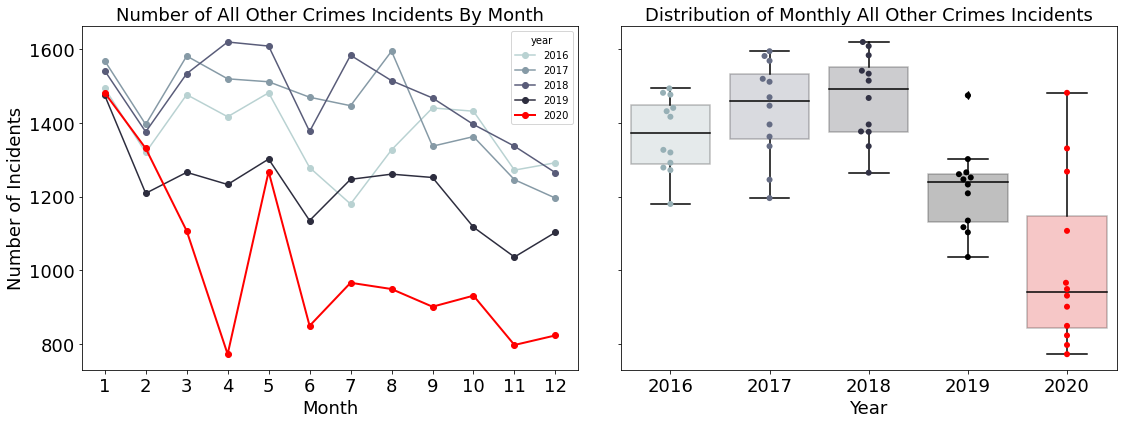

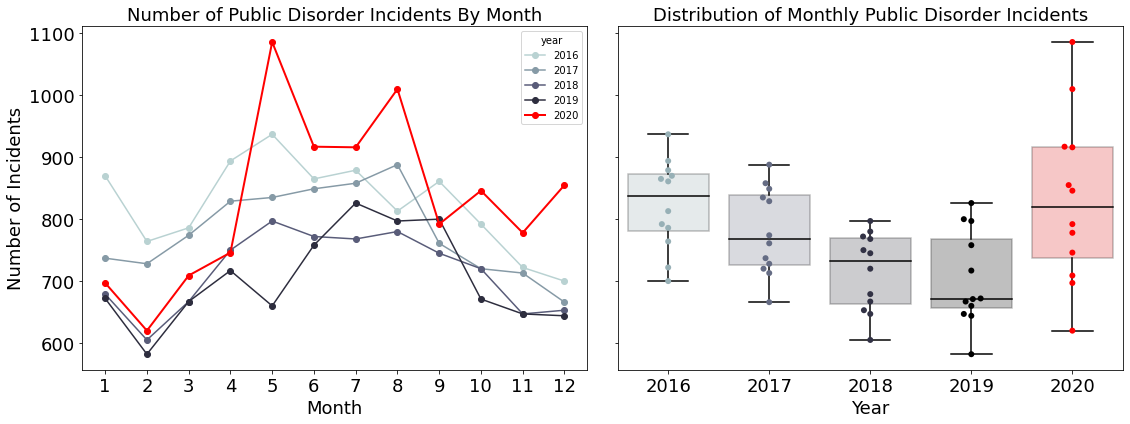

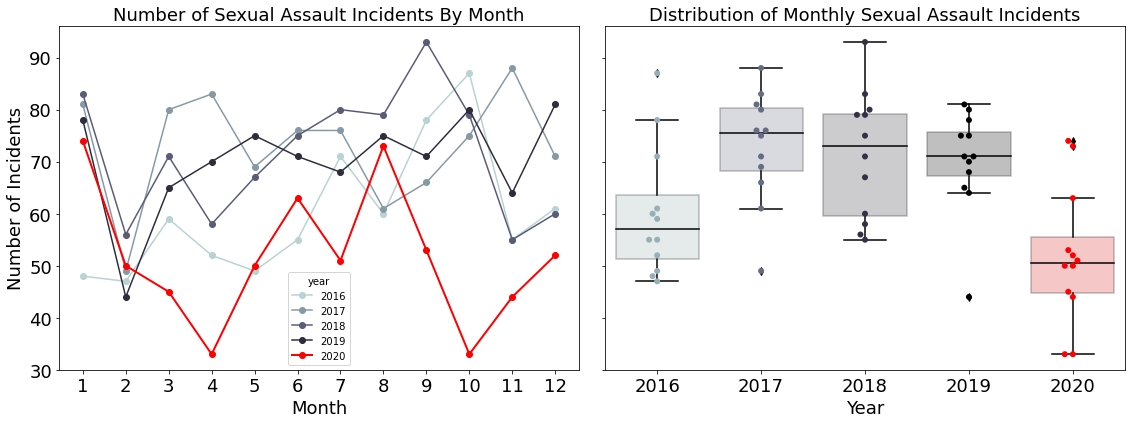

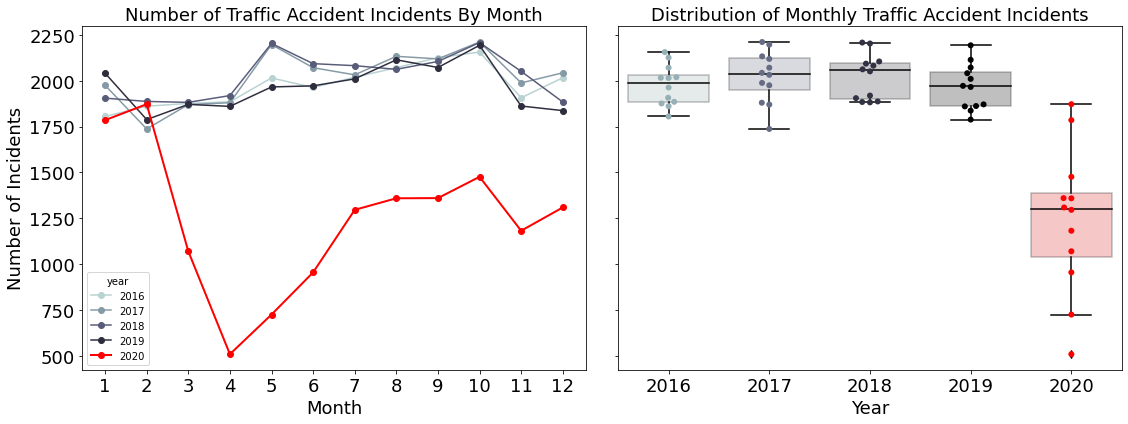

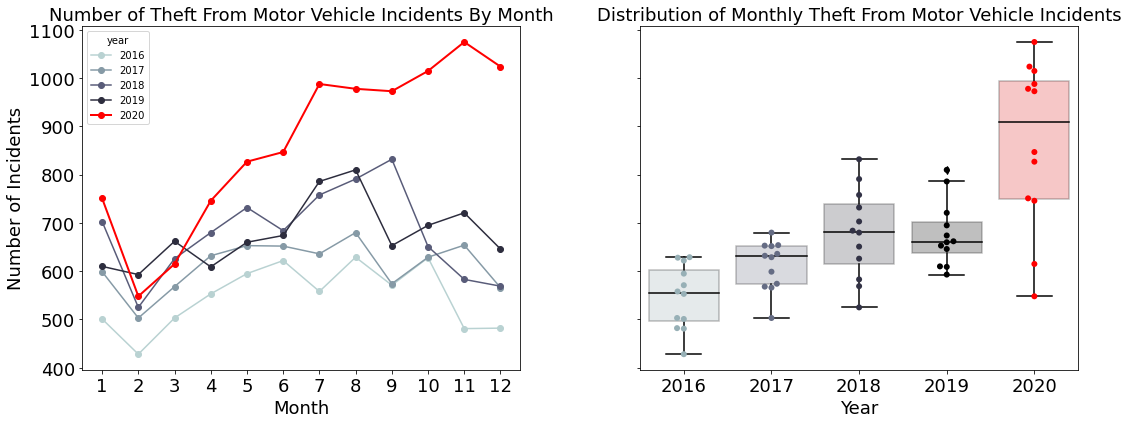

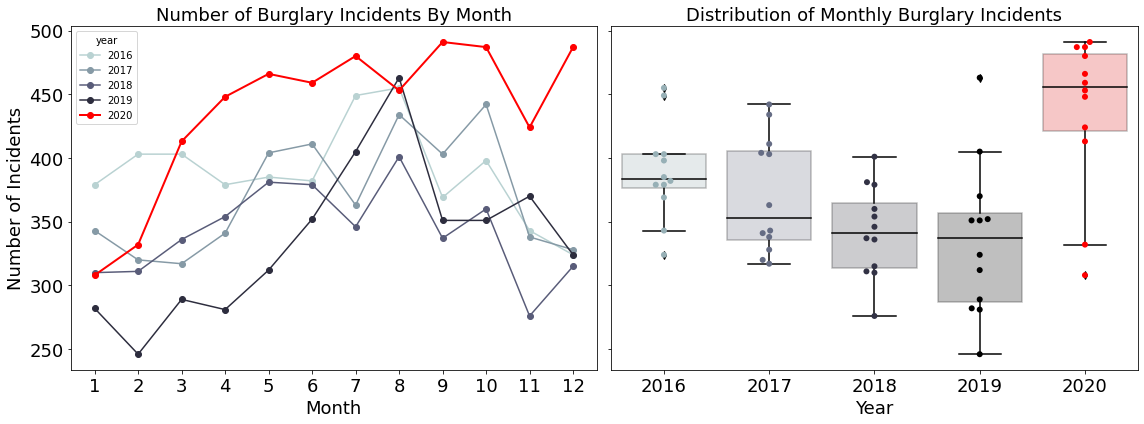

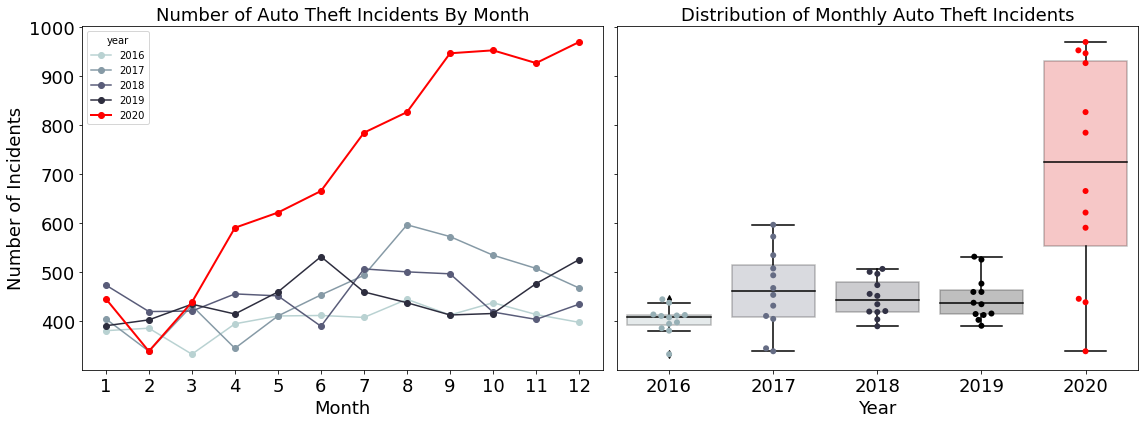

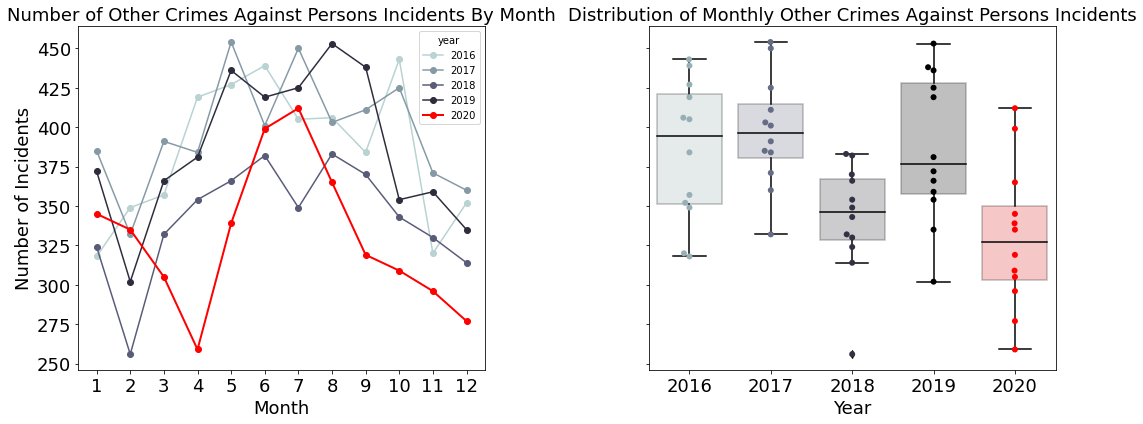

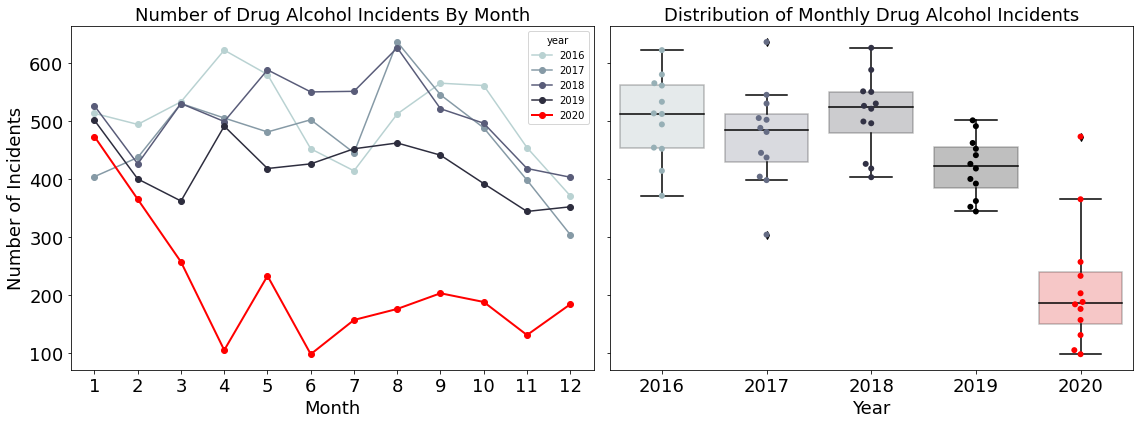

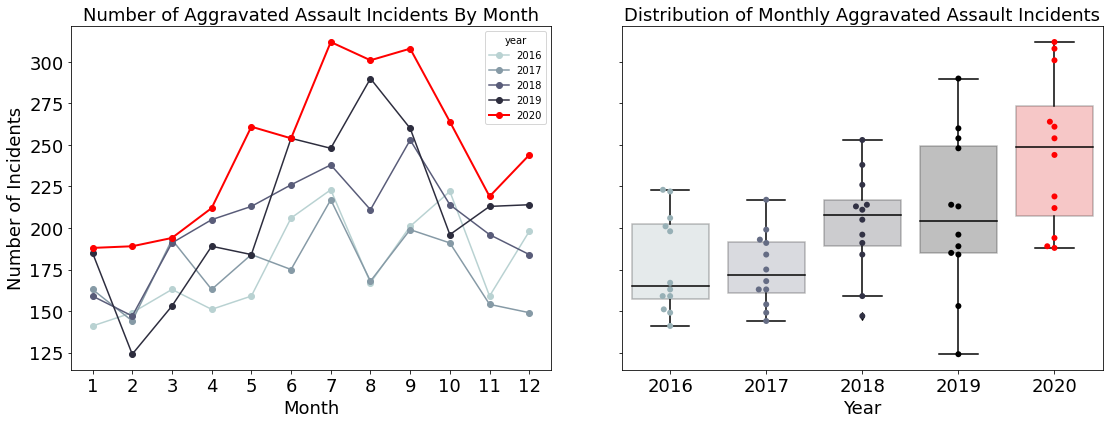

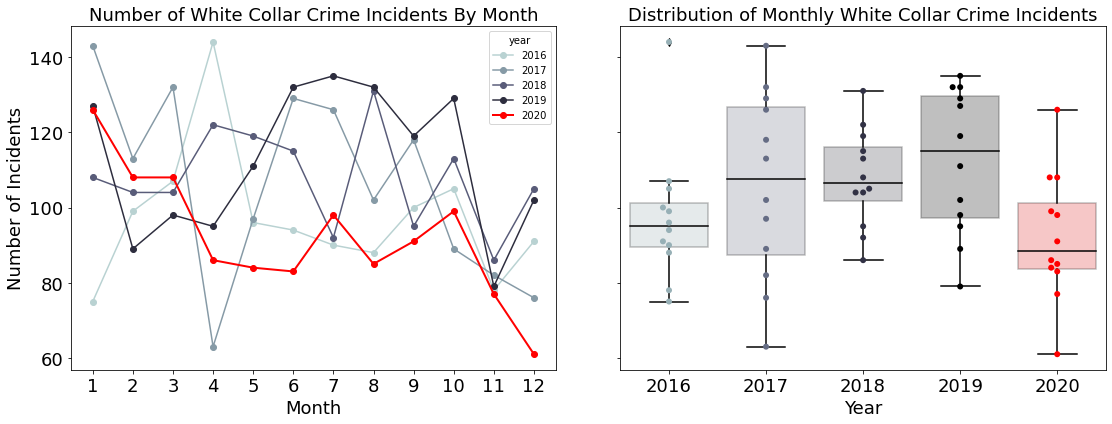

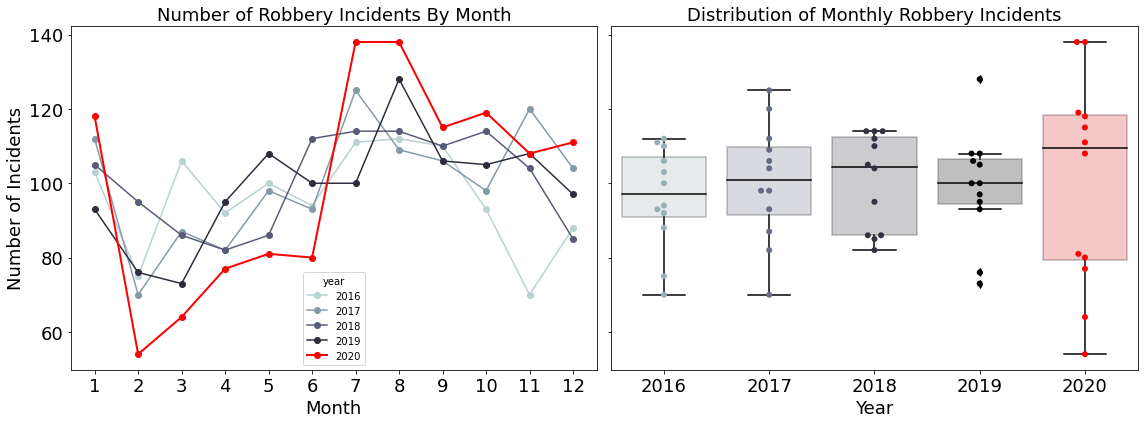

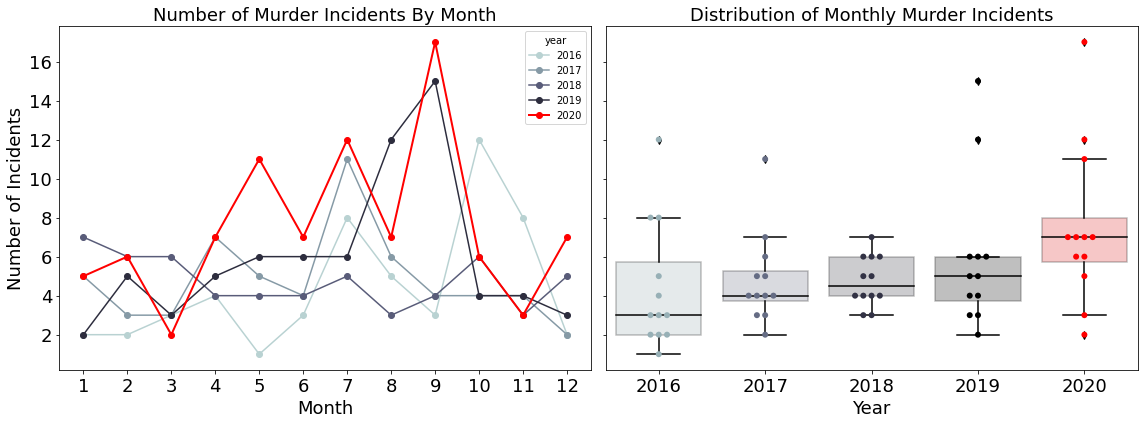

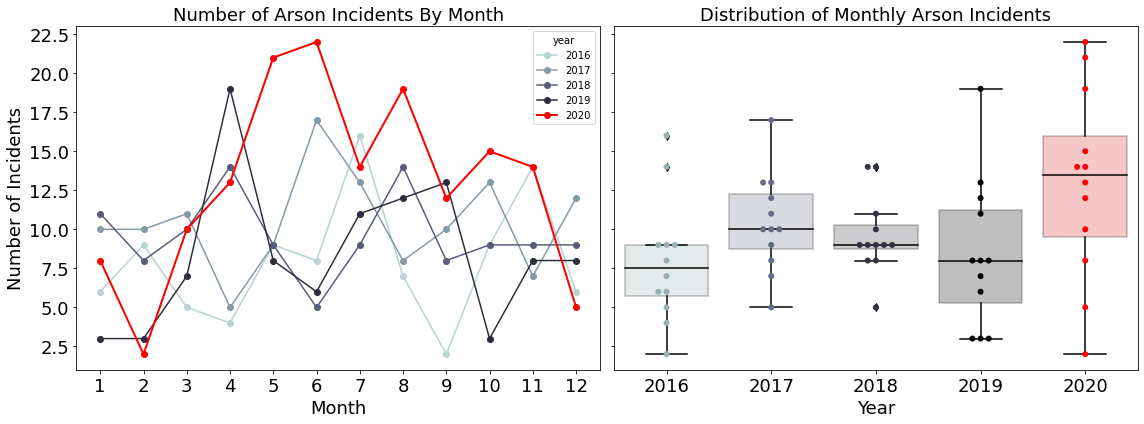

In [21]:
for cat in crime.OFFENSE_CATEGORY_ID.unique():
    double_plot(crime, cat, 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURENCE_DATE', 'INCIDENT_ID', 18, 'Denver')

# Where is most of the crime happening

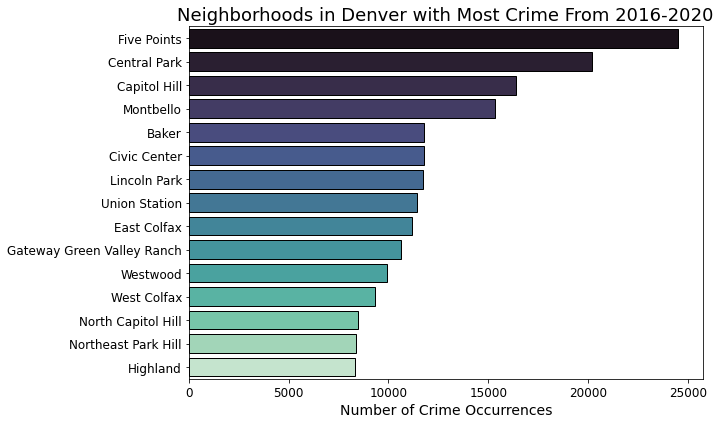

In [22]:
def top_n_neighborhood(n, df, neighborhood_id, city):
    plt.subplots(figsize=(10, max(1, n//2.5)))
    df = df[(df.year!= 2021) & (df[neighborhood_id]!='cbd')]
    neighborhood = df.groupby(neighborhood_id).size().sort_values(ascending=False).reset_index()
    neighborhood.rename(columns={neighborhood_id:'Neighborhood', 0:'Count'}, inplace=True)
    top_n = neighborhood[:n]
    g = sns.barplot(x='Count', y='Neighborhood', data=top_n, palette='mako', edgecolor='black')
    g.axes.set_title(f"Neighborhoods in {city} with Most Crime From 2016-2020",fontsize=18)
    g.set_xlabel("Number of Crime Occurrences",fontsize=14)
    g.set_ylabel("")
    g.set_yticklabels([capitalize_titles(y.get_text()) for y in g.get_yticklabels()])
    g.tick_params(labelsize=12)
    plt.tight_layout()
    
top_n_neighborhood(15, crime, 'NEIGHBORHOOD_ID', 'Denver')

In [23]:
neighborhood = crime.groupby('NEIGHBORHOOD_ID').size().sort_values(ascending=False).reset_index()
neighborhood.rename(columns={'NEIGHBORHOOD_ID':'Neighborhood', 0:'Count'}, inplace=True)
top = list(neighborhood[:3].Neighborhood)
top

import plotly.graph_objects as go

fig = go.Figure()
for neighborhood in top:
    tmp = crime[crime['NEIGHBORHOOD_ID']== neighborhood]
    tmp = tmp.groupby(['year', 'month']).agg({'INCIDENT_ID':'count'}).rename(columns={'INCIDENT_ID':'count'}).reset_index()
    tmp['date'] = pd.to_datetime(dict(year=tmp.year, month=tmp.month, day=1))   
    fig.add_trace(go.Scatter(x=tmp['date'], y=tmp['count'], name=neighborhood,
                             line=dict(width=2)))

fig.update_layout(
    title={
        'text': "Monthly Crime Counts From Top Contributing Neighborhoods",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor='white')

fig.show()

Noticed that Stapleton is missing data from August 2020 onward. On further investigation it was renamed Central Park. Will adjust accordingly.

In [24]:
# crime = pd.read_csv('/Users/hilary/Documents/dsi/repos/Capstone1/data/denver_crime.csv')

# print('stapleton' in crime.NEIGHBORHOOD_ID.unique())

# def change_neighborhood(hood):
#     #Mid2020 Stapleton's name changed to Central Park - change for all years
#     if hood == 'stapleton':
#         return 'central-park'
#     return hood

# crime['NEIGHBORHOOD_ID'] = crime['NEIGHBORHOOD_ID'].map(change_neighborhood)

# print('stapleton' in crime.NEIGHBORHOOD_ID.unique())

# crime.to_csv('/Users/hilary/Documents/dsi/repos/Capstone1/data/denver_crime.csv')

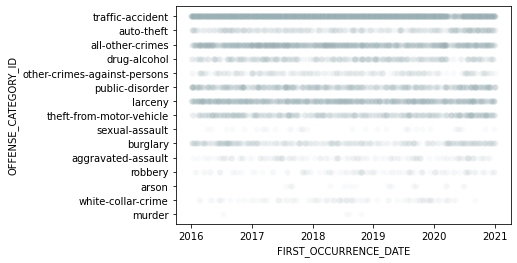

In [25]:
df = crime[['INCIDENT_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE', 'NEIGHBORHOOD_ID']]
sns.scatterplot(data=df[df.NEIGHBORHOOD_ID=='baker'], x='FIRST_OCCURRENCE_DATE', y='OFFENSE_CATEGORY_ID', alpha=0.05)

### See Denver Folium Notebook for initial Folium investigation.